In [1]:
import tifffile as tiff
from octvision3d.utils import get_filenames
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

In [3]:
# path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/imagesTr"
# label_path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/labelsTr"
dataset = "CAVRI-A_nnUNet_Dataset"
path = f"/data/dkermany_data/OCT/nnUNet_raw/{dataset}/imagesTs/"
pred_path = f"/data/dkermany_data/OCT/nnUNet_raw/{dataset}/imagesTs/predicted/ensemble/"
label_path = f"/data/dkermany_data/OCT/nnUNet_raw/{dataset}/labelsTs"

color_map = {
    1: "#80ae80",  # CNV
    2: "#f1d691",  # DRU
    3: "#b17a65",  # EX
    4: "#6fb8d2",  # FLU
    5: "#d8654f",  # GA
    6: "#dd8265",  # HEM
    7: "#90ee90",  # RPE
    8: "#a200ff",  # RET
    9: "#8f8f70",  # CHO
    10: "#e1f0fd", # VIT
    11: "#75fafd", # HYA
    12: "#b0fdd1", # SHS
    13: "#fdfd54", # ART
    14: "#387df8", # ERM
    15: "#643200", # SES
}

label_map = {
    1: "CNV",
    2: "DRU",
    3: "EX",
    4: "FLU",
    5: "GA",
    6: "HEM",
    7: "RPE",
    8: "RET",
    9: "CHO",
    10: "VIT",
    11: "HYA",
    12: "SHS",
    13: "ART",
    14: "ERM",
    15: "SES"
}

In [4]:
def plot_confusion_matrix(true_labels_flat, pred_labels_flat, label_map, save=False, suffix=""):
    all_labels = np.arange(1, 16)

    new_order = [7, 8, 9, 6, 10, 11, 13, 14, 12, 2, 3, 0, 1, 4, 5]
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels_flat, pred_labels_flat, labels=all_labels)

    # Rearrange the confusion matrix according to new_order
    conf_matrix = conf_matrix[new_order, :][:, new_order]

    # Normalize the confusion matrix by row (i.e., by the sum of true labels in each row)
    # Use np.where to handle division by zero and avoid NaNs
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_normalized = np.divide(conf_matrix, row_sums, where=row_sums!=0)

    # Define a custom function for formatting annotations
    def annotate_fmt(val):
        if val < 0.01:
            return "0"
        return f"{val:.2f}"
    
    # Create a 2D array of formatted strings
    annot = np.array([[annotate_fmt(cell) for cell in row] for row in conf_matrix_normalized])

    # Rearrange the labels according to new_order
    labels_list = list(label_map.values())
    labels_reordered = [labels_list[i] for i in new_order]

    # Plot the confusion matrix using seaborn's heatmap
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        conf_matrix_normalized,
        annot=annot,
        fmt="",
        cmap="Blues",
        xticklabels=labels_reordered,
        yticklabels=labels_reordered,
        cbar=False,
    )
    
    # Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(suffix)

    # Save the plot as an SVG file
    if save:
        if len(suffix) > 0:
            suffix = f"_{suffix}"
        output_path = os.path.join(os.path.expanduser("~"), "Downloads", f"confusion_matrix{suffix}.svg")
        plt.savefig(output_path, format="svg")
    
    # Show the plot
    plt.show()

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0001S_20160715103809_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  45037  601286 2460759 1400679   35593  103660   34586]
(19, 640, 385)
(19, 640, 385)


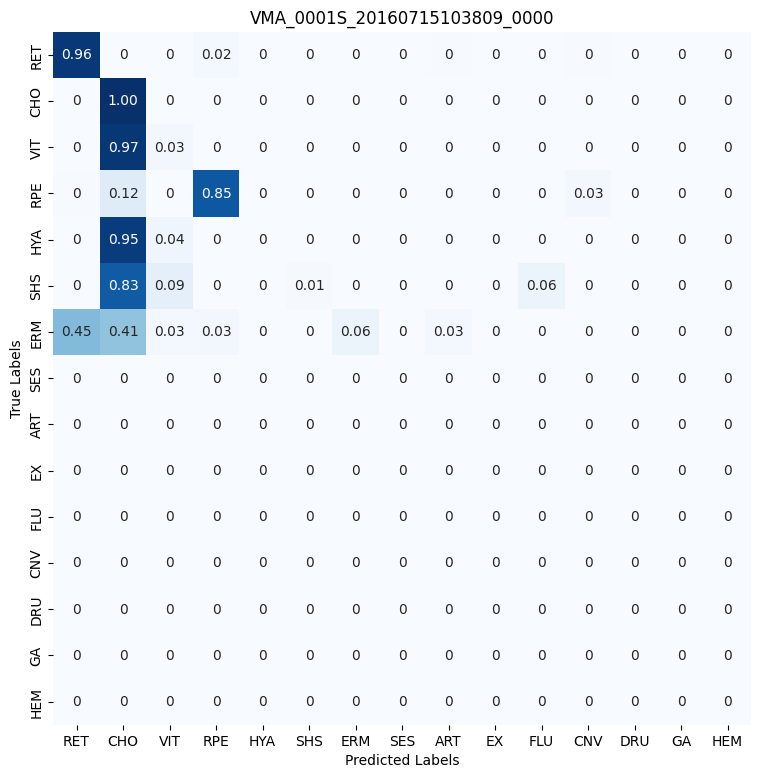

Prediction


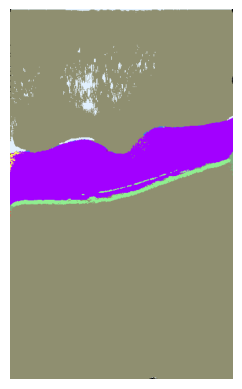

Label


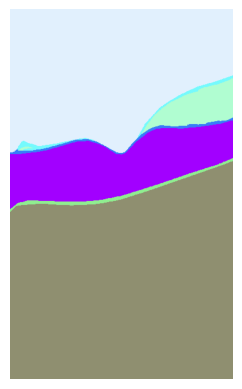

Original


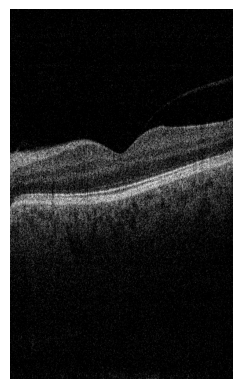

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0002D_20160920124457_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12] [  54708  653714 1400714 2471925   69962   30577]
(19, 640, 385)
(19, 640, 385)


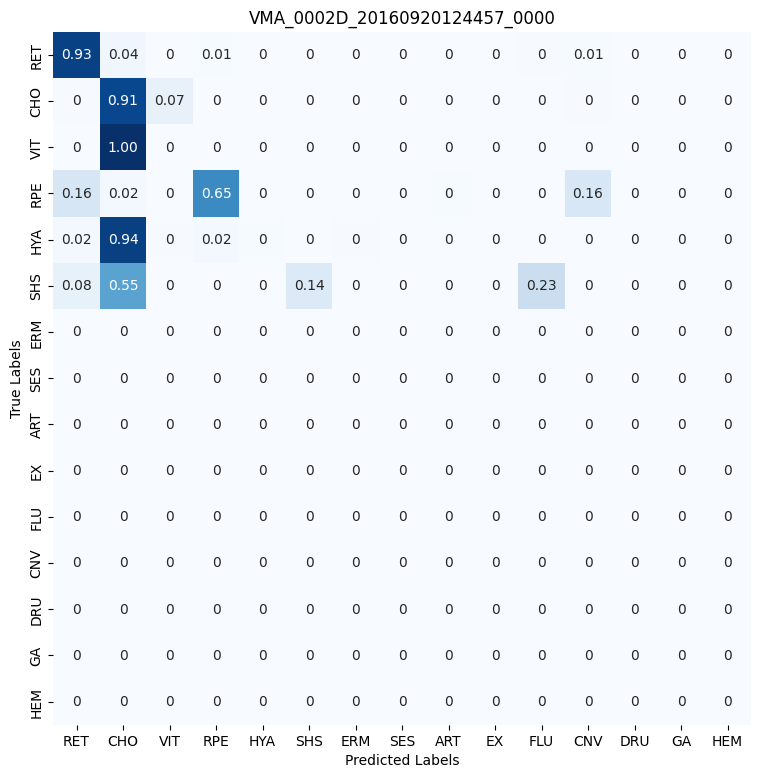

Prediction


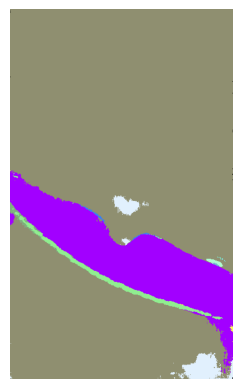

Label


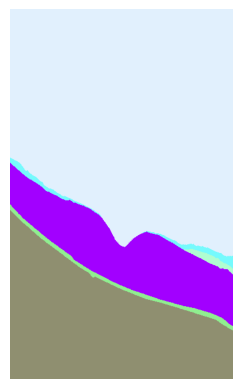

Original


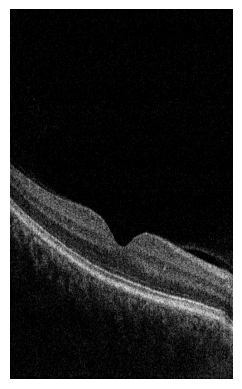

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0003D_20170703205804_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12] [  46818  659201 1525078 2335297   58116   57090]
(19, 640, 385)
(19, 640, 385)


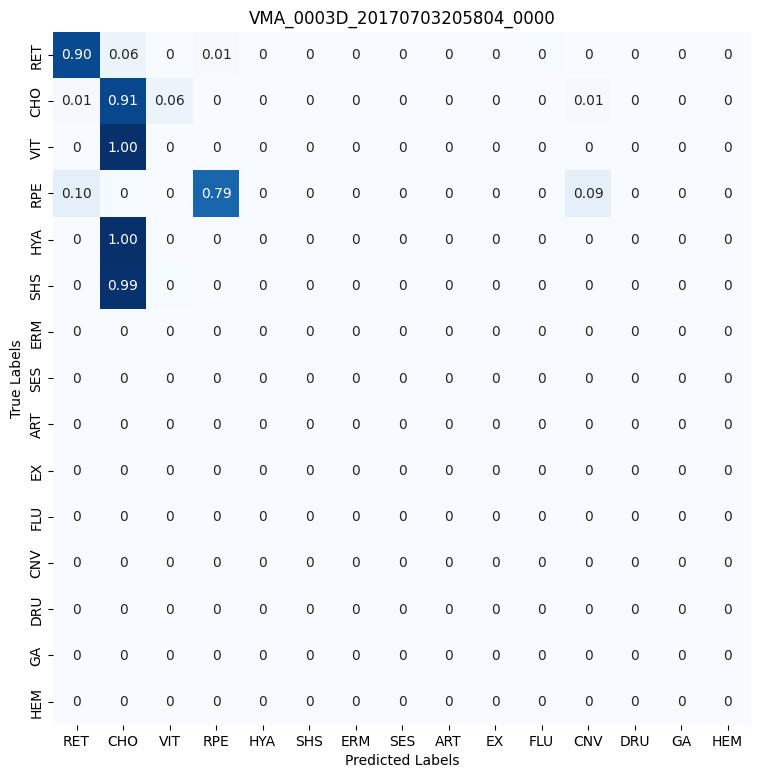

Prediction


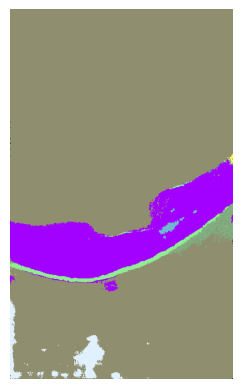

Label


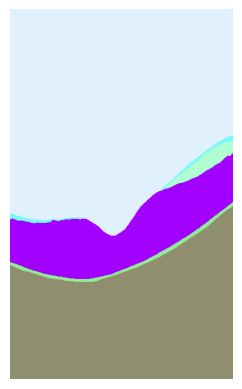

Original


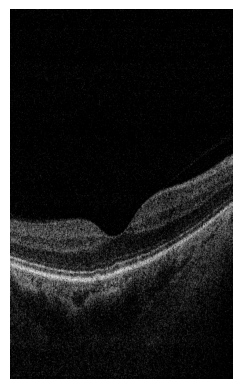

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0004D_20170308103533_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  39345  608437 2051045 1693505   36996  248245    4027]
(19, 640, 385)
(19, 640, 385)


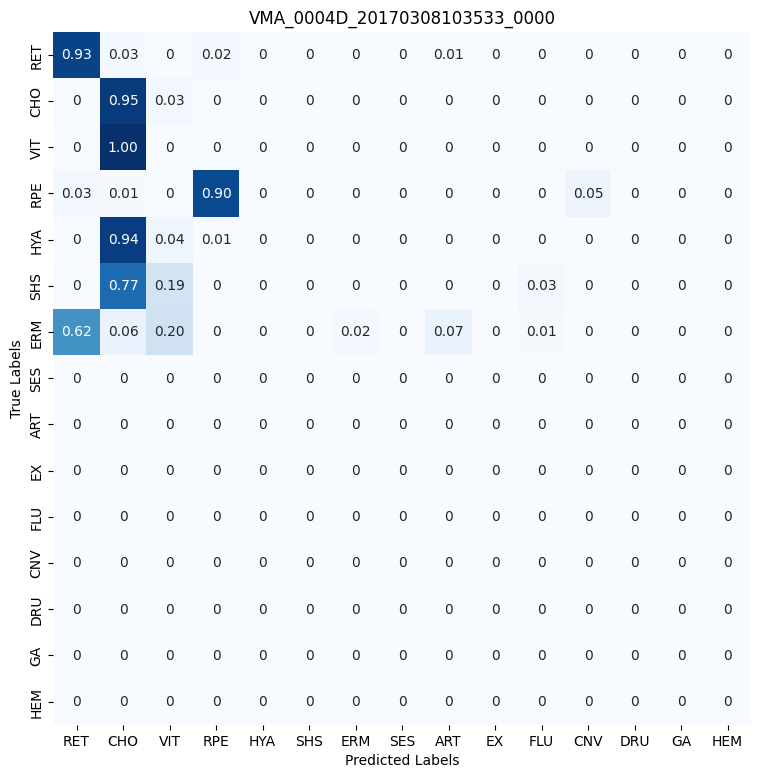

Prediction


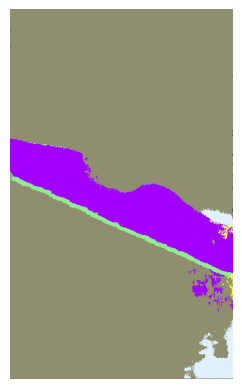

Label


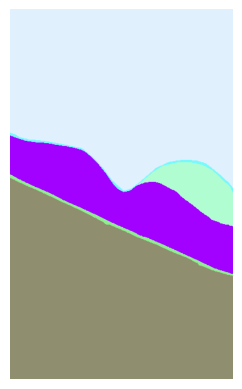

Original


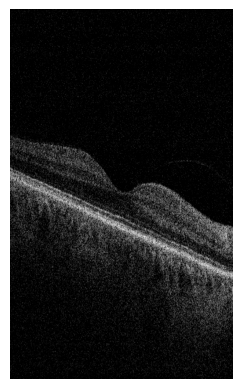

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0004S_20170308104114_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  39926  592022 1481501 2293281   38393  226187   10290]
(19, 640, 385)
(19, 640, 385)


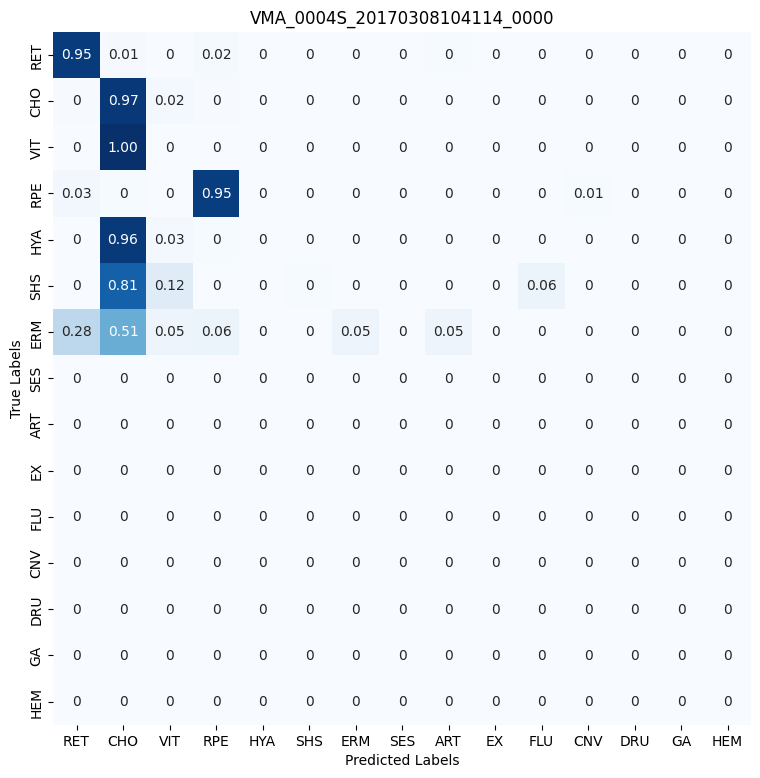

Prediction


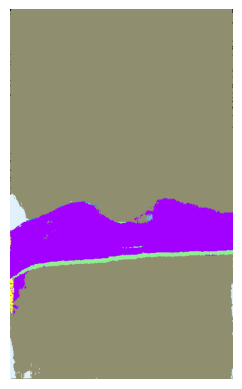

Label


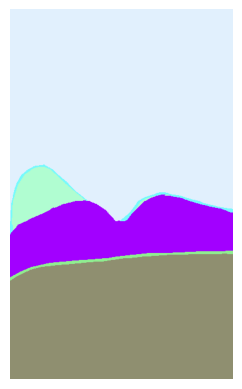

Original


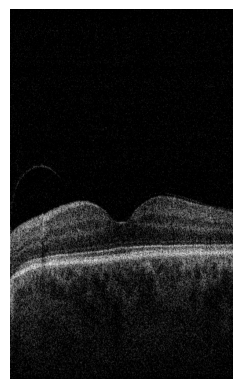

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0005D_20160920095750_0000.tif
(19, 640, 385)
[ 2  7  8  9 10 11] [    176   40560  663410 1967187 1969493   40774]
(19, 640, 385)
(19, 640, 385)


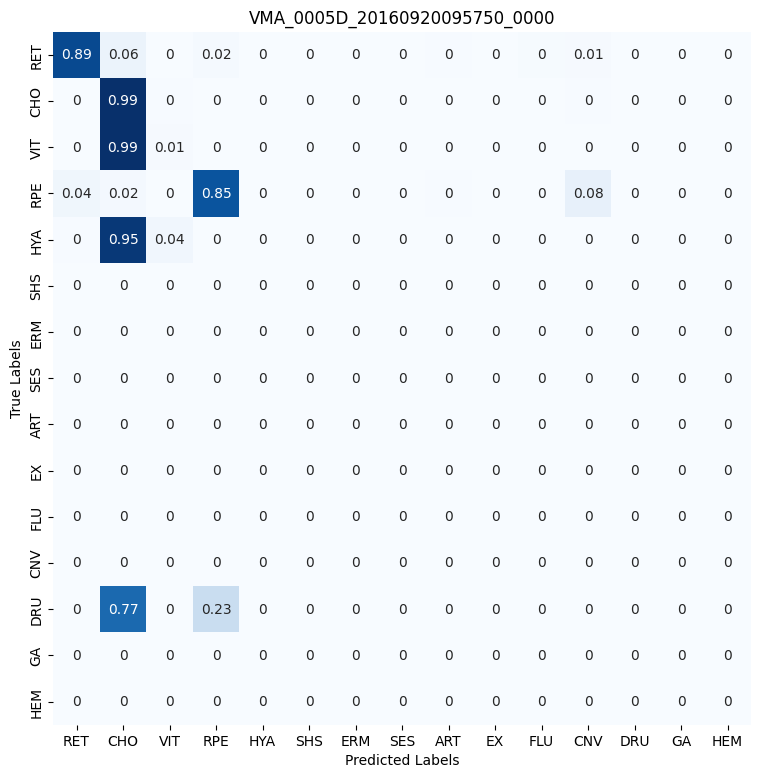

Prediction


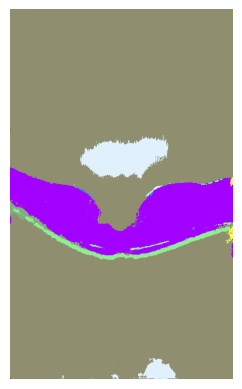

Label


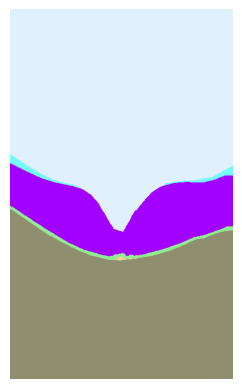

Original


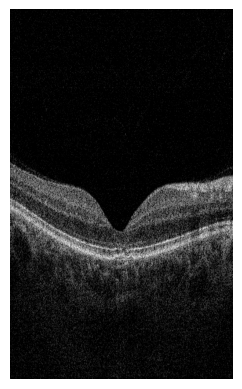

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0006D_20170215102048_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  43897  565216 2324707 1507861   41878  161216   36825]
(19, 640, 385)
(19, 640, 385)


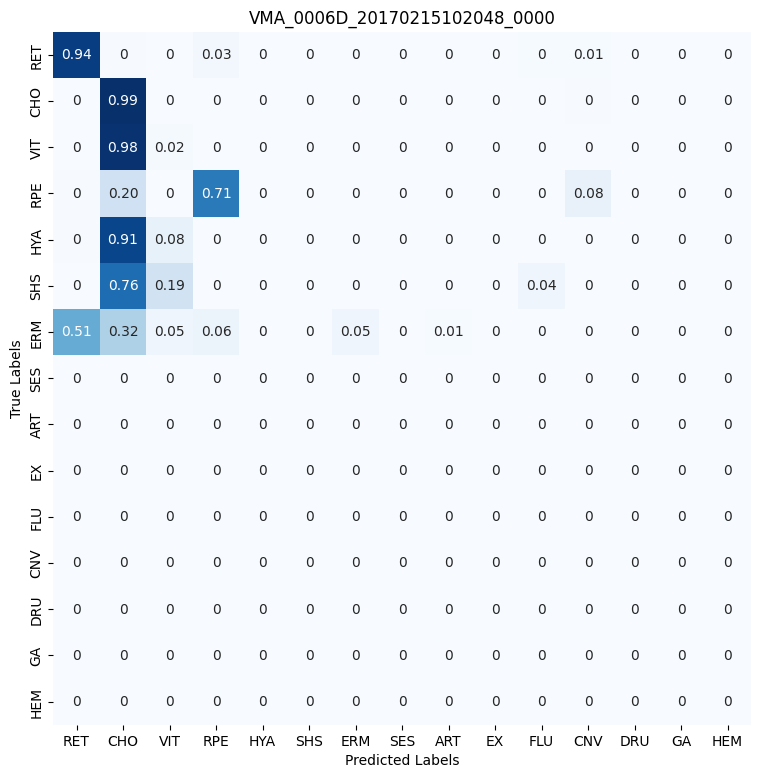

Prediction


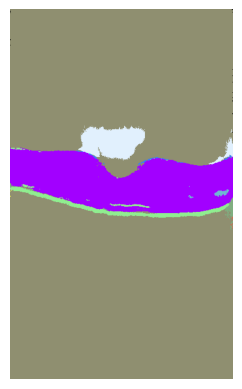

Label


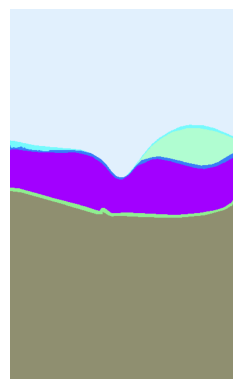

Original


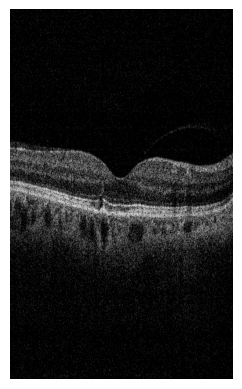

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0007D_20140923110518_0000.tif
(19, 640, 385)
[ 3  7  8  9 10 11 12 14] [    262   44800  615972 1517187 2366800   52139   72032   12408]
(19, 640, 385)
(19, 640, 385)


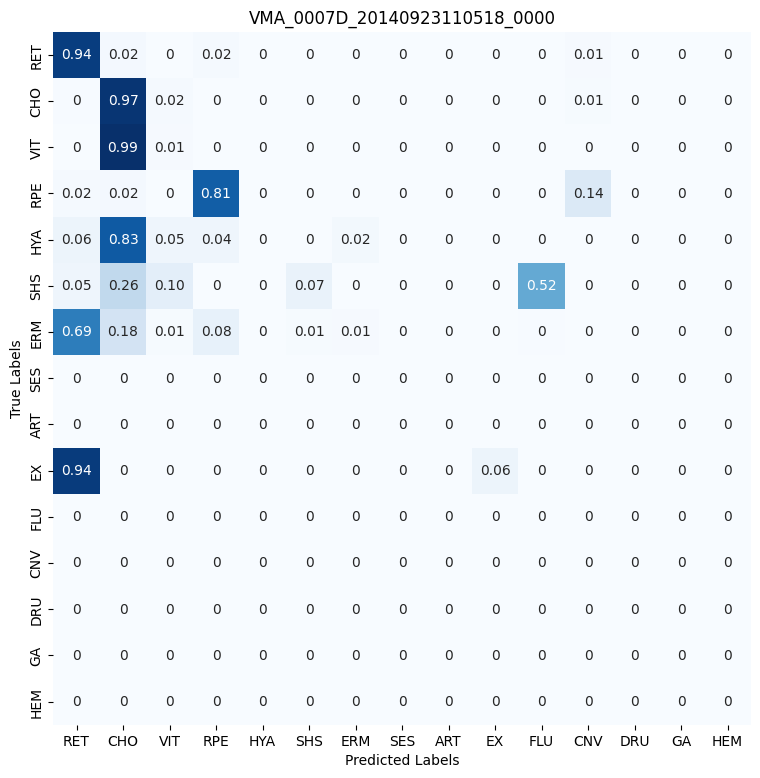

Prediction


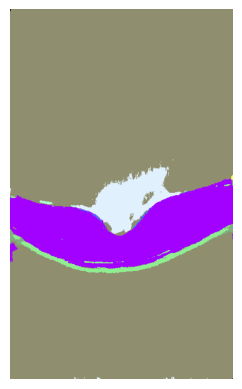

Label


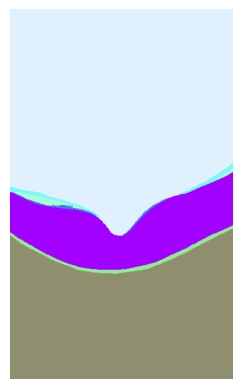

Original


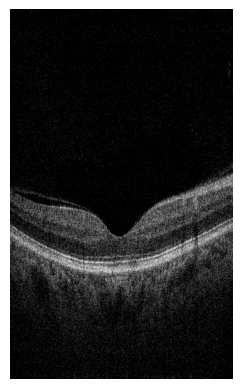

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0008S_20151102125900_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12] [  50424  584899 1724079 2025675   58421  238102]
(19, 640, 385)
(19, 640, 385)


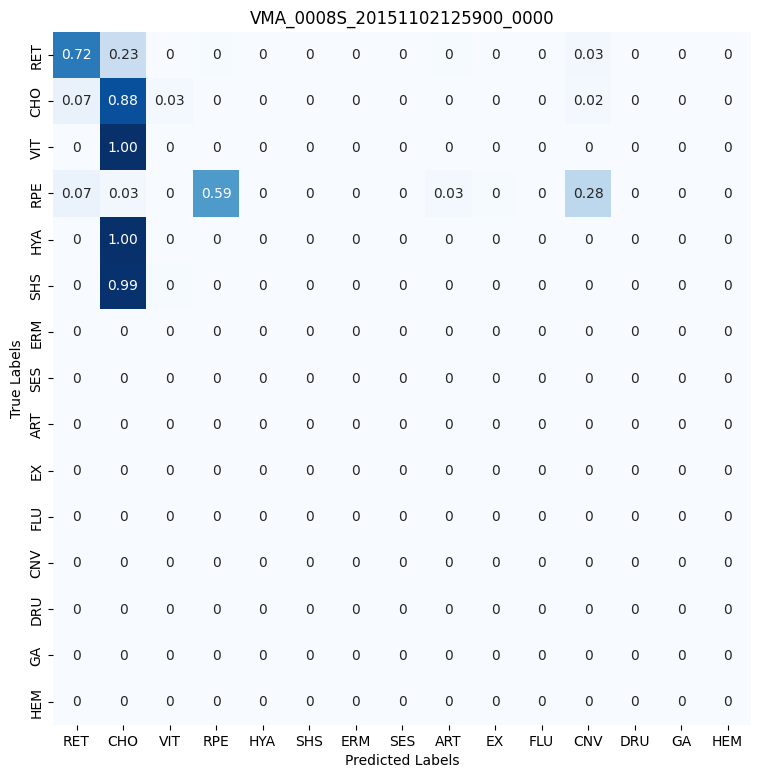

Prediction


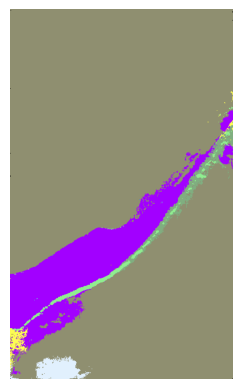

Label


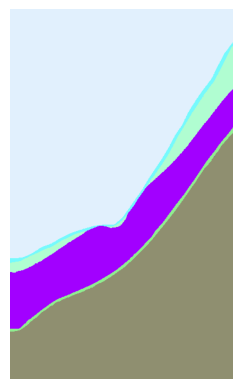

Original


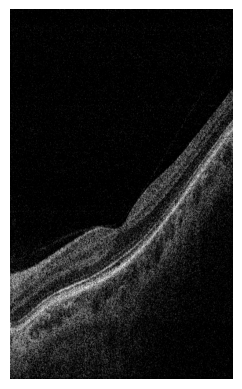

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0009S_20170119123503_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12] [  39060  678109 1623545 2169844   34843  136199]
(19, 640, 385)
(19, 640, 385)


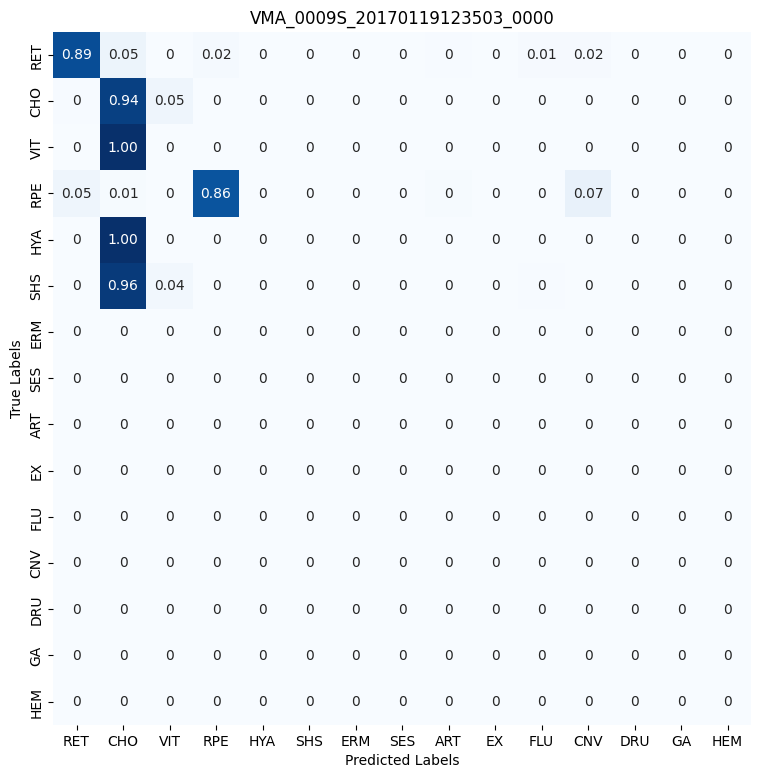

Prediction


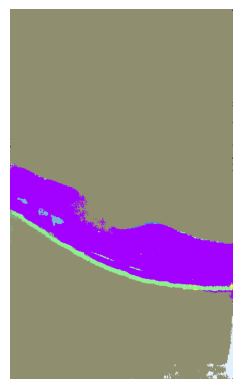

Label


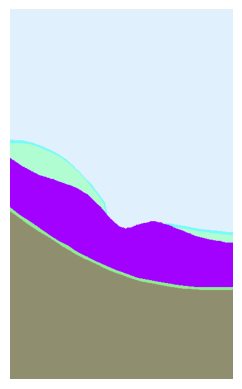

Original


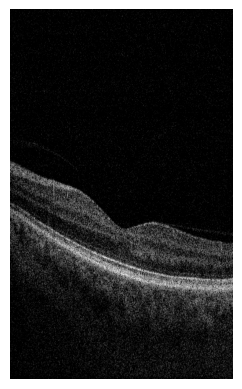

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0010S_20180904101637_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  41696  641644 1298542 2572865   35147   65169   26537]
(19, 640, 385)
(19, 640, 385)


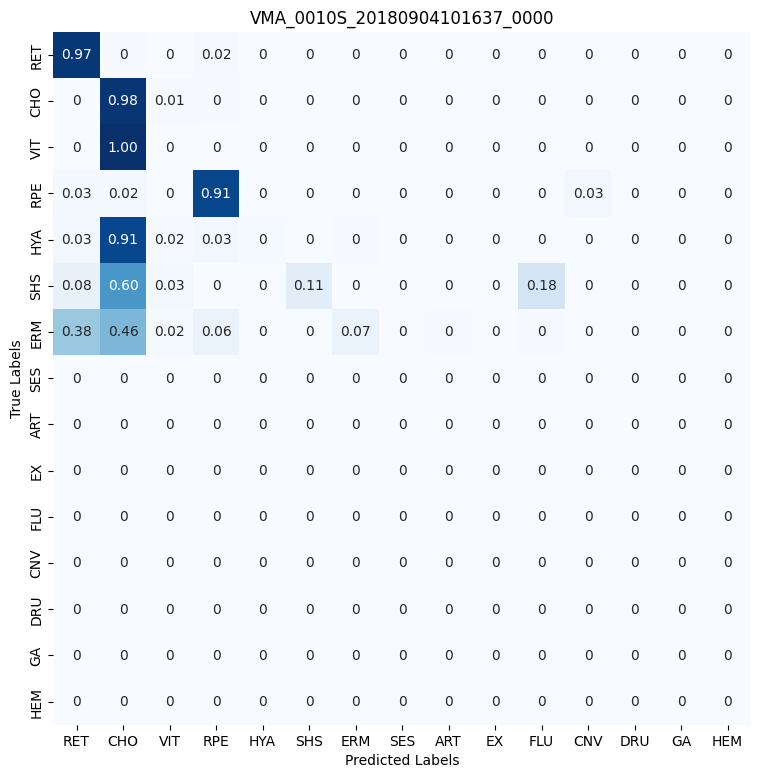

Prediction


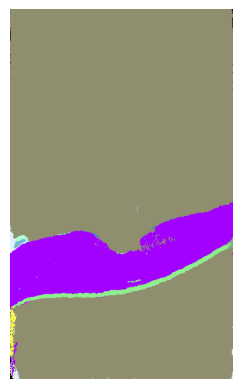

Label


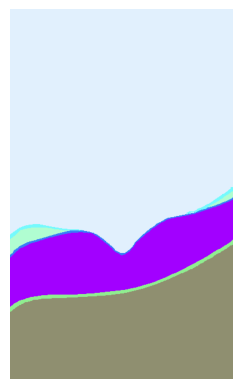

Original


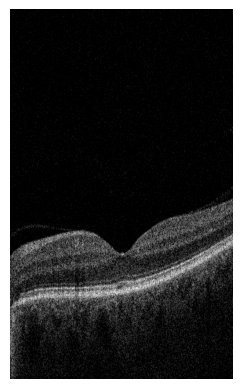

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0011D_20170410101513_0000.tif
(19, 640, 385)
[ 5  7  8  9 10 11 12 14] [   2883   42267  644934 1470701 2324049   34768  131553   30445]
(19, 640, 385)
(19, 640, 385)


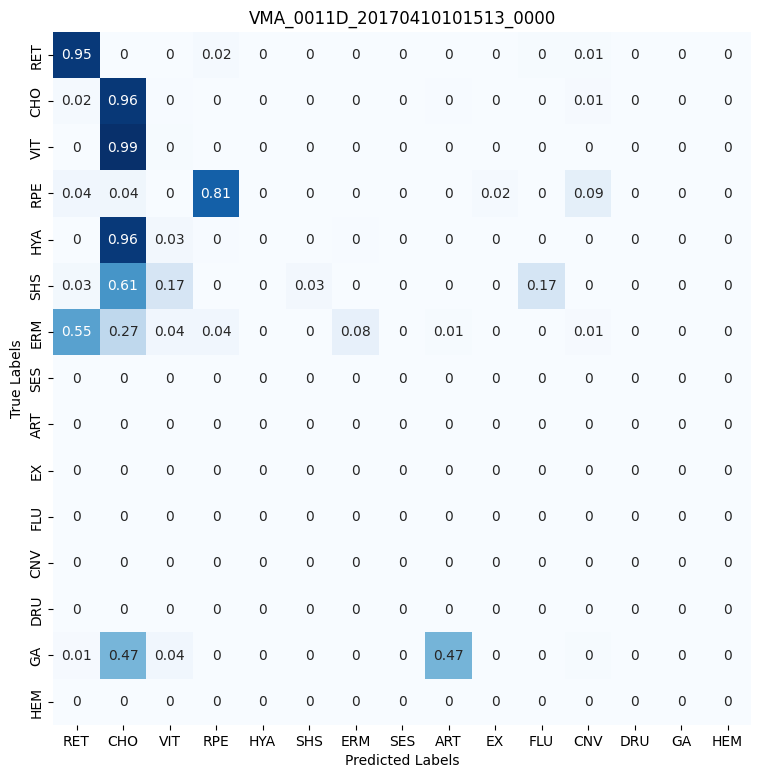

Prediction


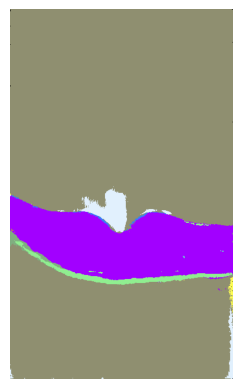

Label


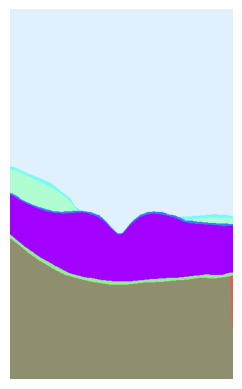

Original


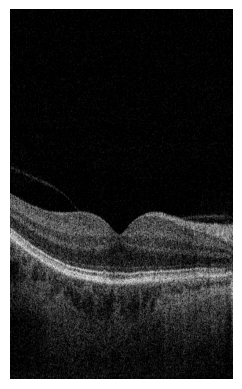

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0011S_20170410101804_0000.tif
(19, 640, 385)
[ 5  7  8  9 10 11 12 14] [   1649   45143  618107 1165166 2555539   37822  229171   29003]
(19, 640, 385)
(19, 640, 385)


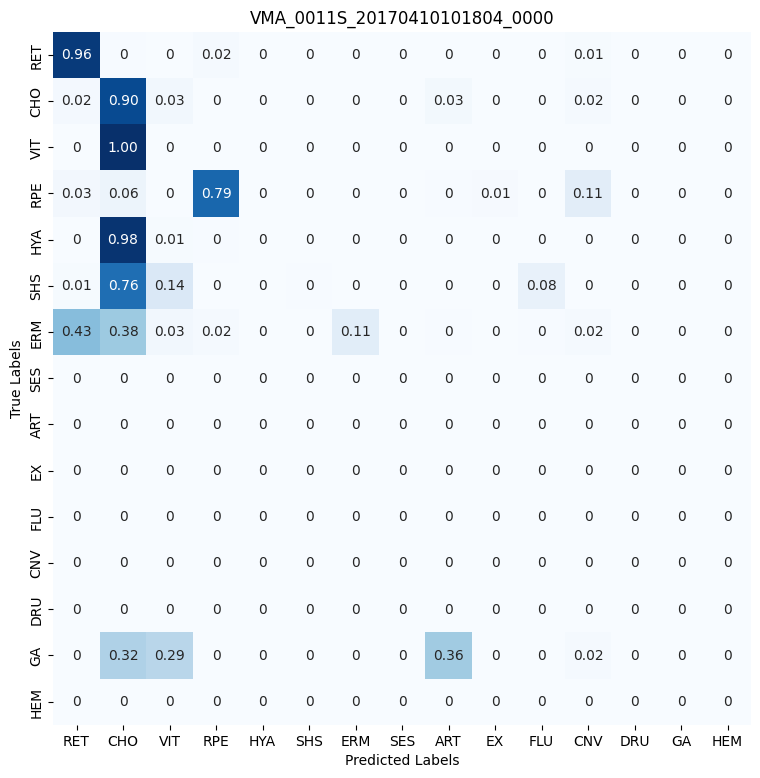

Prediction


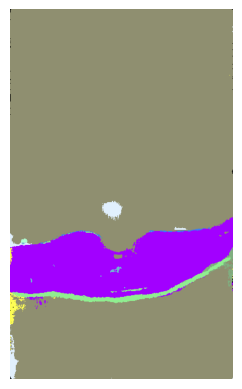

Label


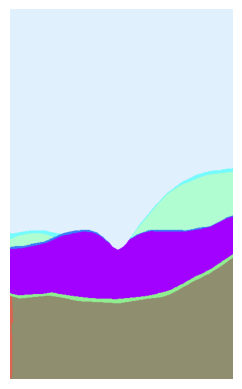

Original


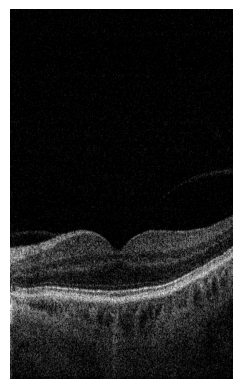

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0012D_20170818122113_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  45213  665633 1137297 2660791   36132  104931   31603]
(19, 640, 385)
(19, 640, 385)


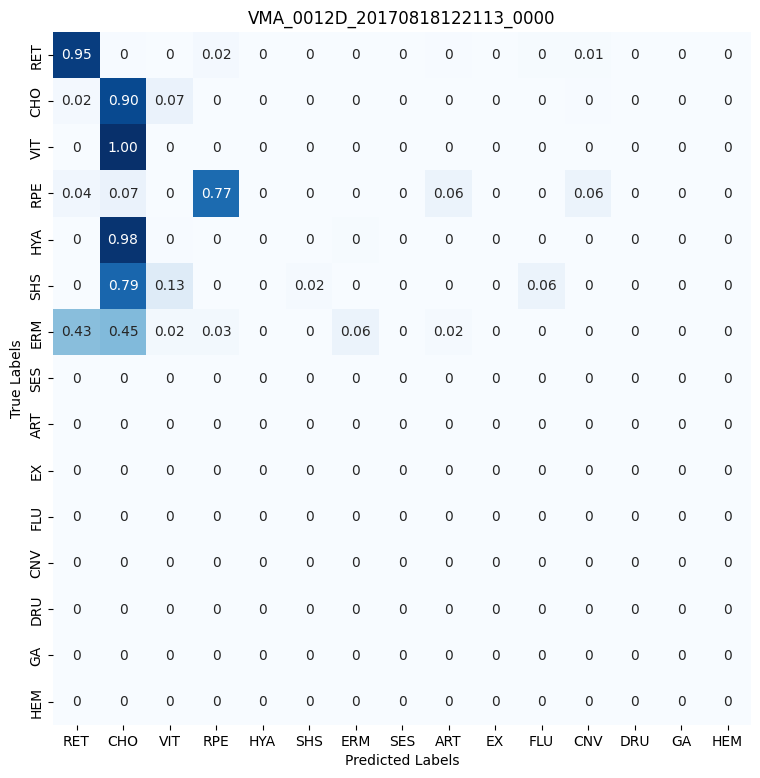

Prediction


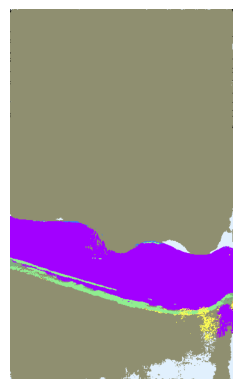

Label


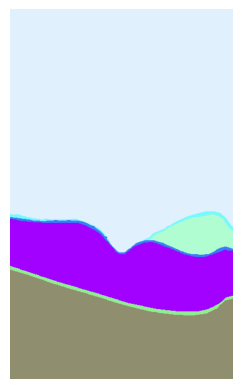

Original


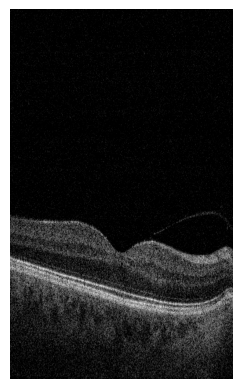

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0013S_20170125102504_0000.tif
(19, 640, 385)
[ 3  7  8  9 10 11 12 14] [    113   49526  619607 2039888 1878983   51919   32037    9527]
(19, 640, 385)
(19, 640, 385)


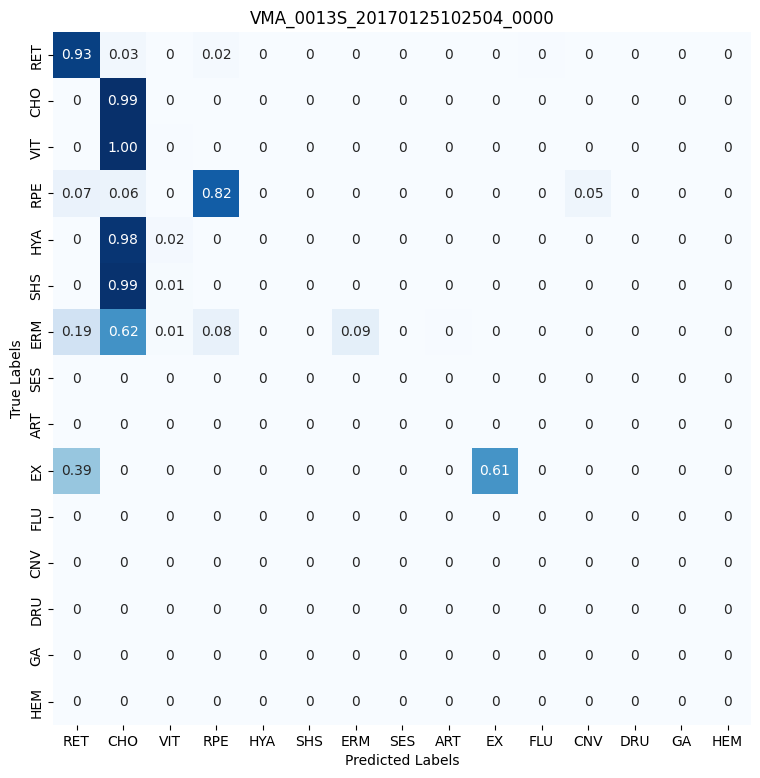

Prediction


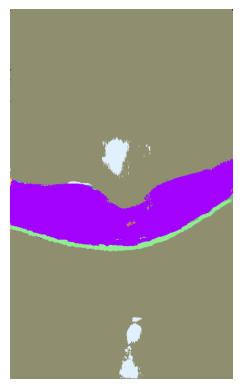

Label


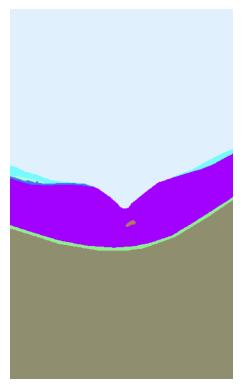

Original


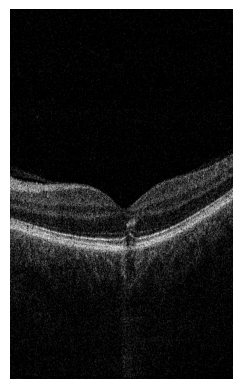

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0014S_20140915121312_0000.tif
(19, 640, 385)
[ 2  7  8  9 10 11 12 14] [   1346   51575  629170 1816411 2027705   64754   77594   13045]
(19, 640, 385)
(19, 640, 385)


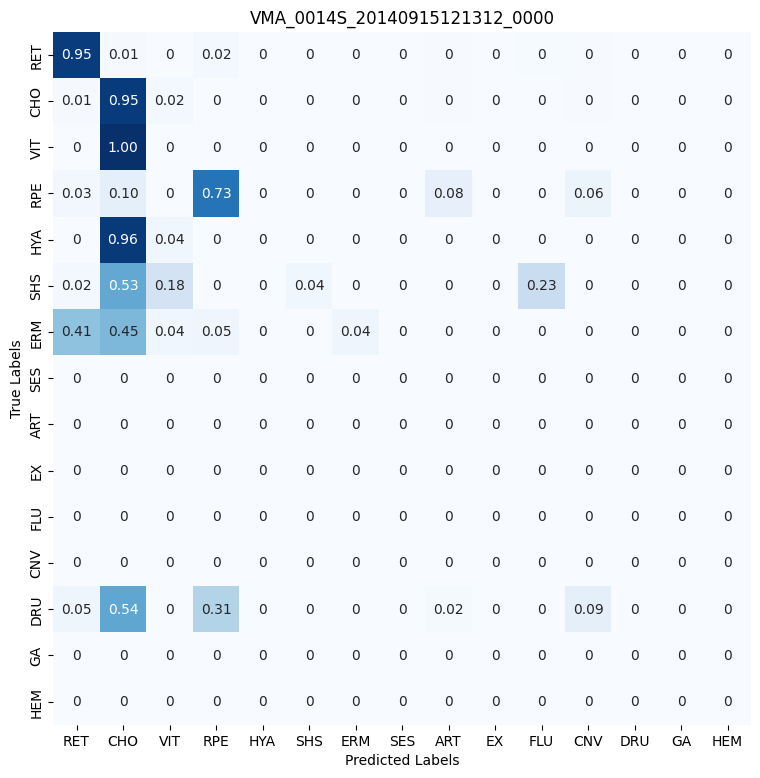

Prediction


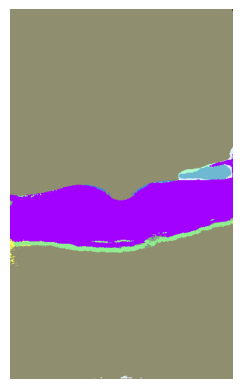

Label


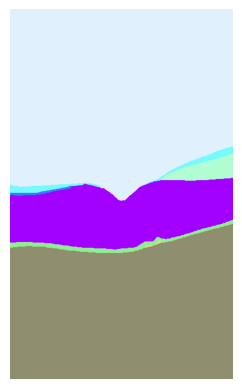

Original


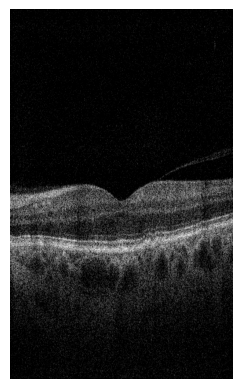

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0015S_20170322103844_0000.tif
(19, 640, 385)
[ 2  7  8  9 10 11 12] [   1003   43383  606162 1640341 2287848   30329   72534]
(19, 640, 385)
(19, 640, 385)


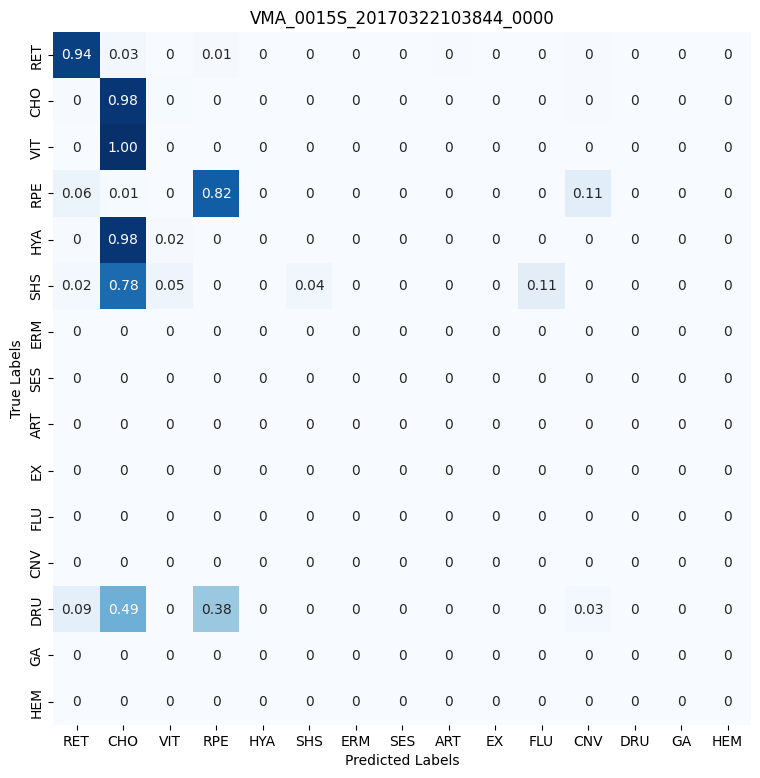

Prediction


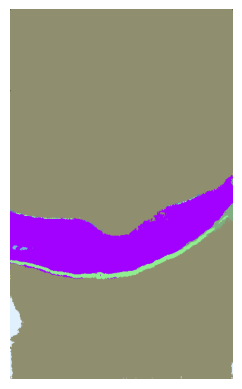

Label


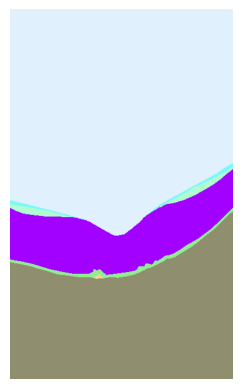

Original


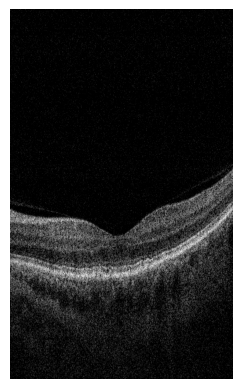

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0016D_20170302110151_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  44149  581991 1376461 2570216   45278   38905   24600]
(19, 640, 385)
(19, 640, 385)


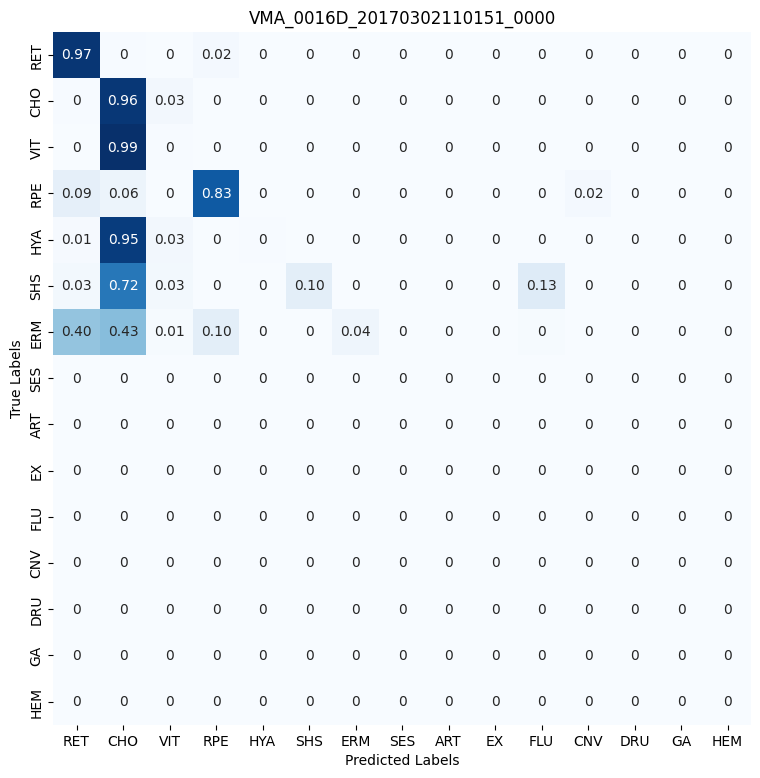

Prediction


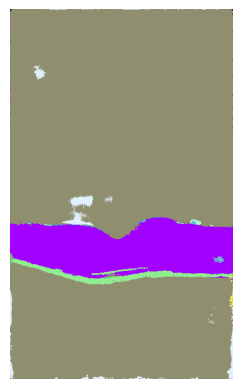

Label


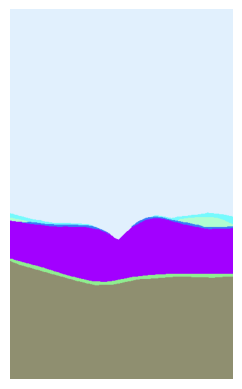

Original


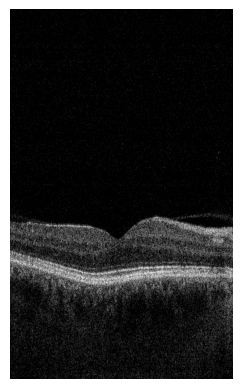

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0017D_20170116113529_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  46786  621375 1667919 2173076   51199  103792   17453]
(19, 640, 385)
(19, 640, 385)


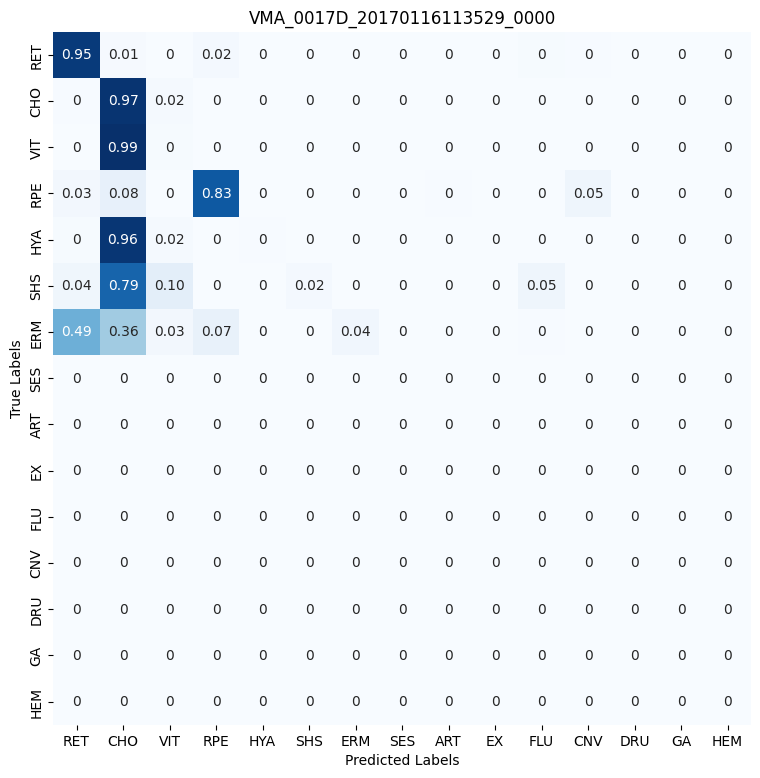

Prediction


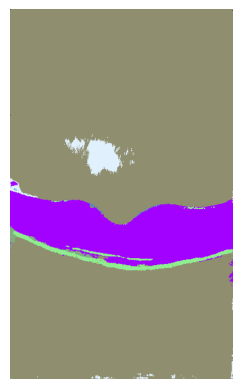

Label


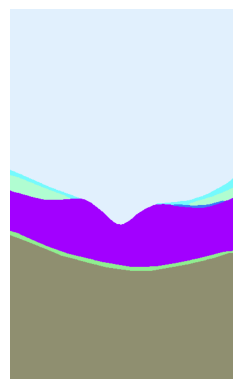

Original


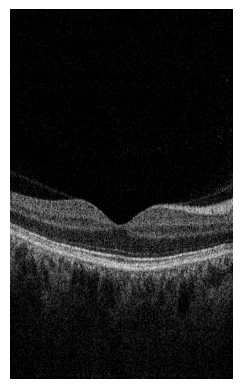

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0018S_20170110113304_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  46289  616508 2008842 1777250   27598  183415   21698]
(19, 640, 385)
(19, 640, 385)


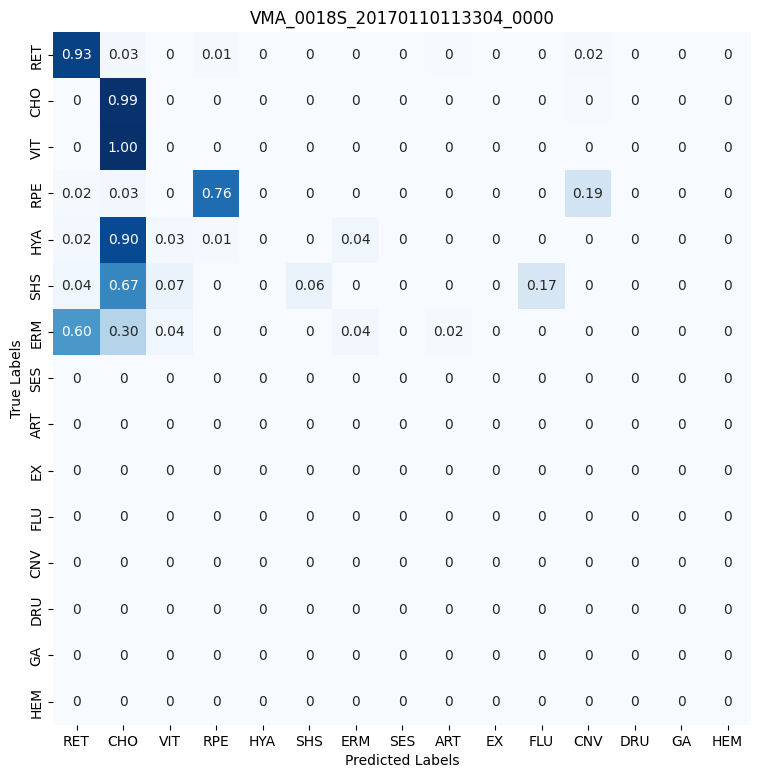

Prediction


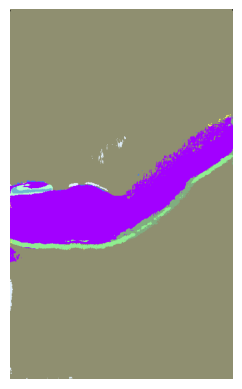

Label


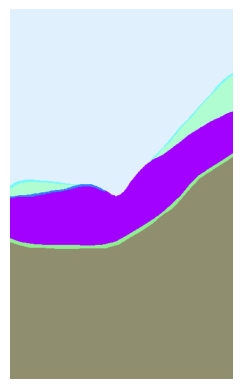

Original


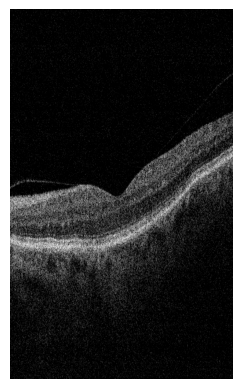

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0019S_20140919110017_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  49337  640766 2523010 1323213   41363   92612   11299]
(19, 640, 385)
(19, 640, 385)


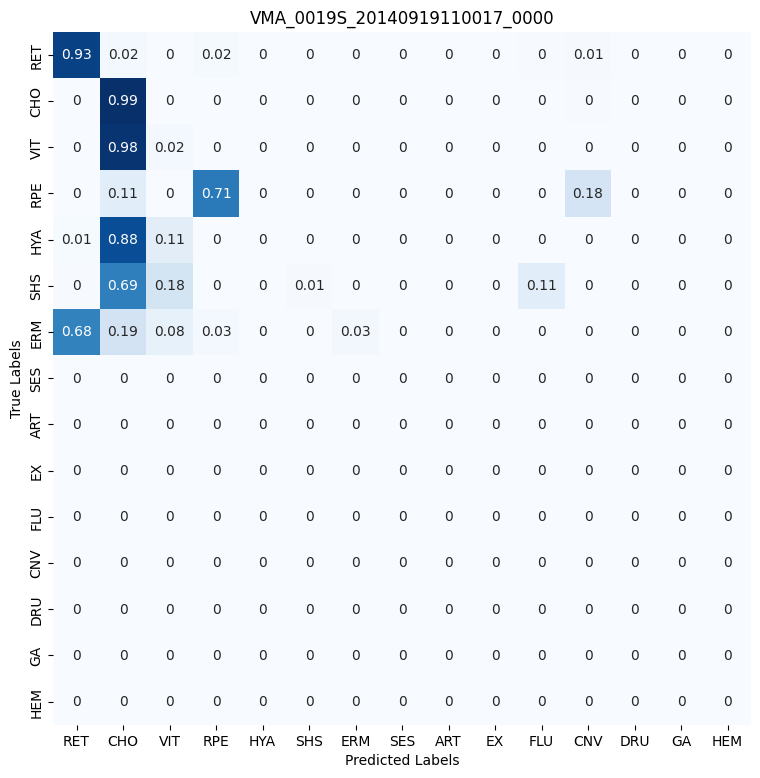

Prediction


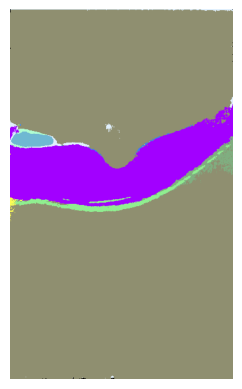

Label


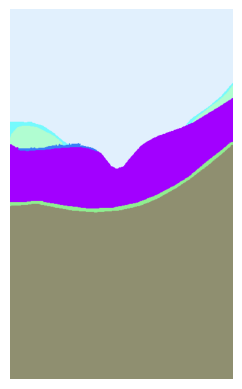

Original


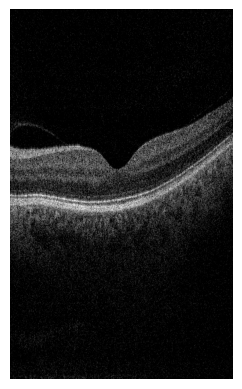

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0020D_20140916115703_0000.tif
(19, 640, 385)
[ 2  7  8  9 10 11 12 14 15] [   4684   45405  601750 2328954 1460545   43762  178605   17875      20]
(19, 640, 385)
(19, 640, 385)


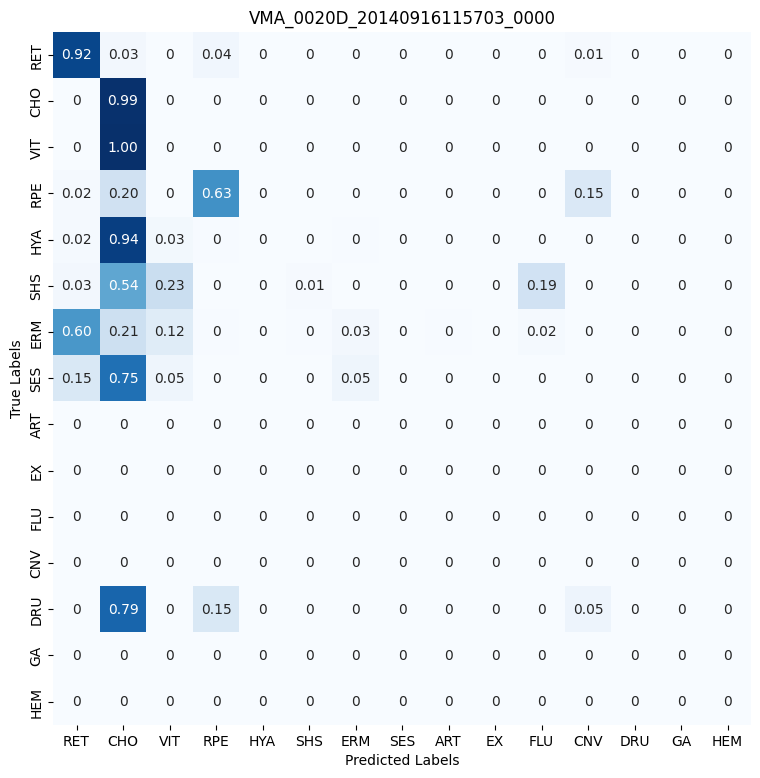

Prediction


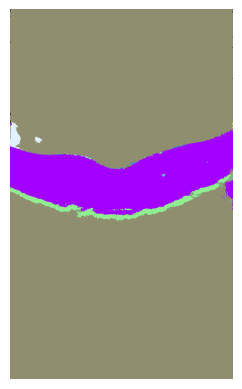

Label


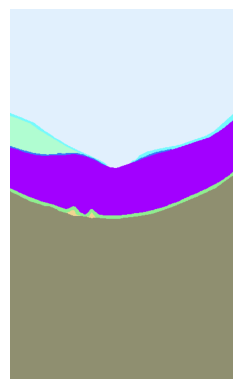

Original


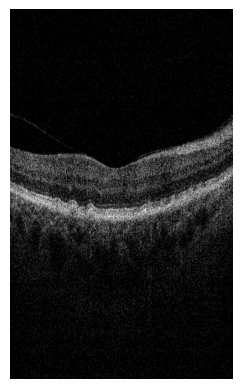

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0021D_20161208144552_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  49258  634452 1519254 2036867   58628  364290   18851]
(19, 640, 385)
(19, 640, 385)


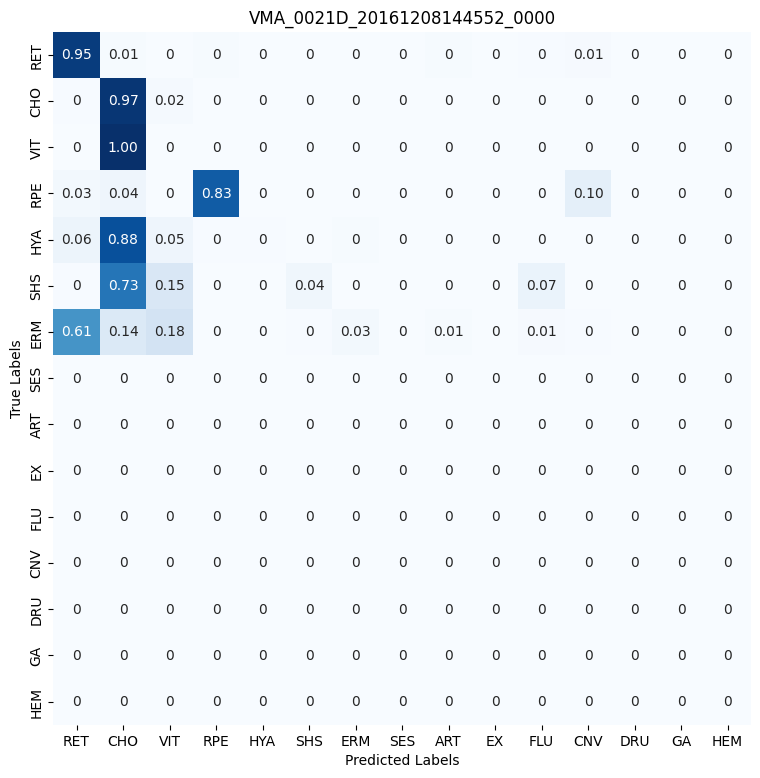

Prediction


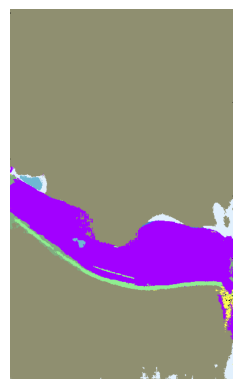

Label


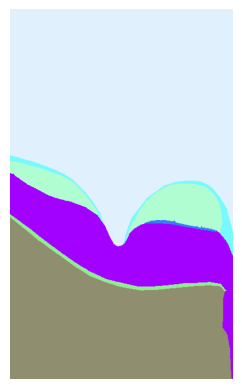

Original


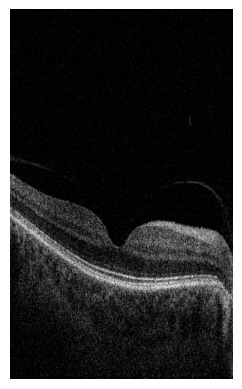

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0022D_20171114103610_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  47194  644434 1806293 1824941   54624  298845    5269]
(19, 640, 385)
(19, 640, 385)


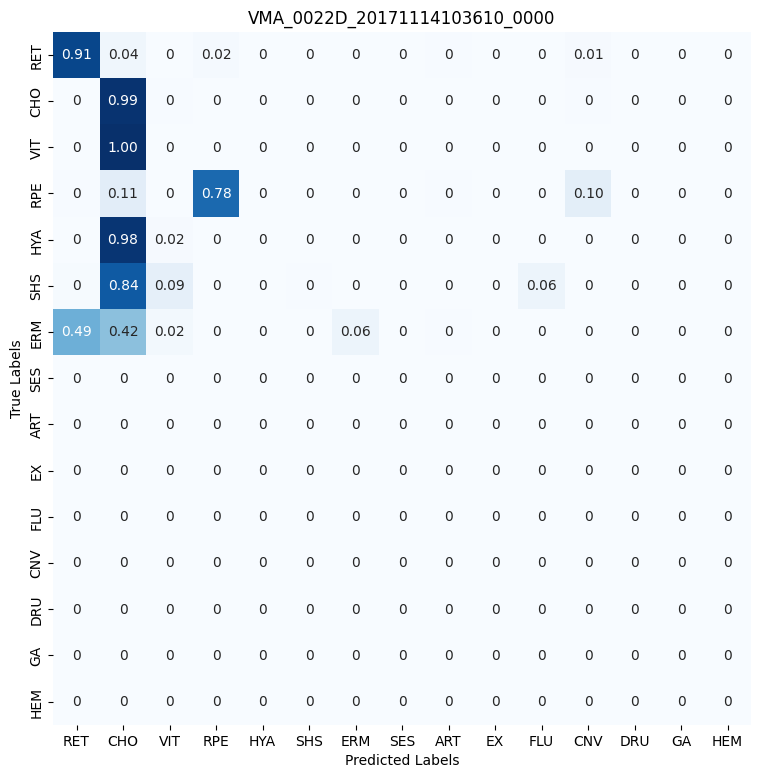

Prediction


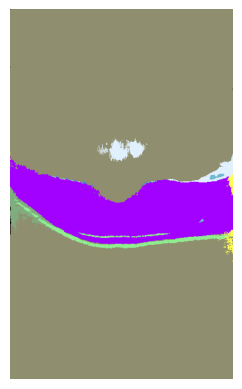

Label


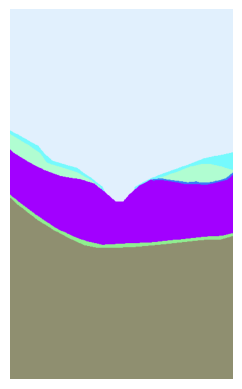

Original


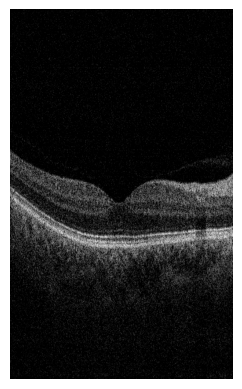

/data/dkermany_data/OCT/nnUNet_raw/CAVRI-A_nnUNet_Dataset/imagesTs/VMA_0023S_20170301115341_0000.tif
(19, 640, 385)
[ 7  8  9 10 11 12 14] [  49815  663416 1603945 2203978   45676   94337   20433]
(19, 640, 385)
(19, 640, 385)


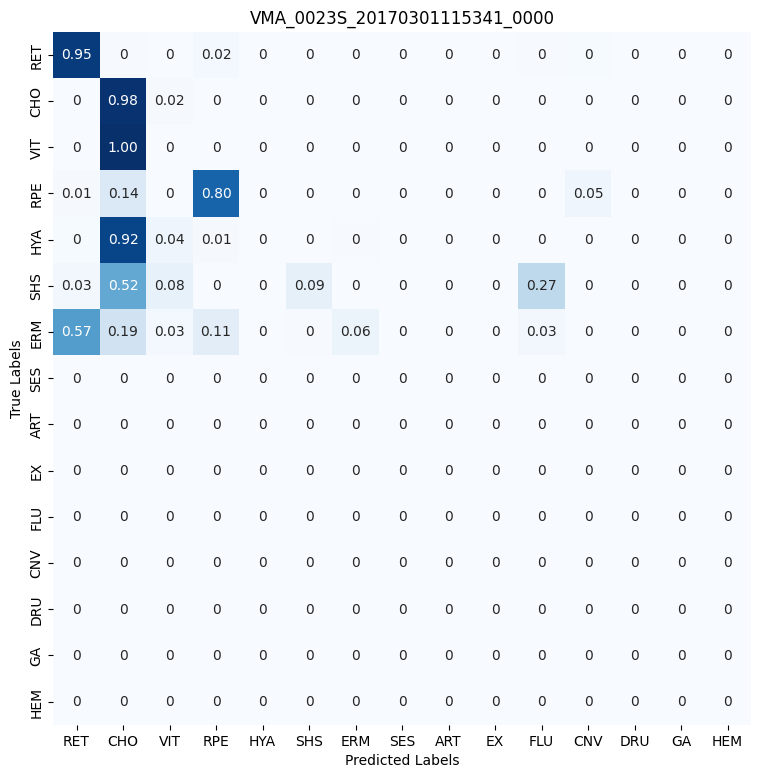

Prediction


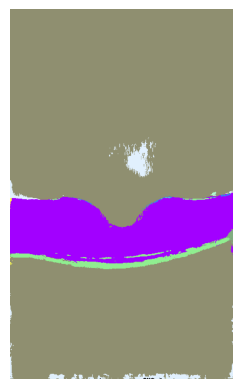

Label


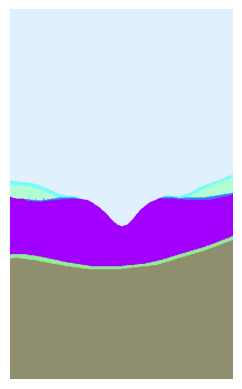

Original


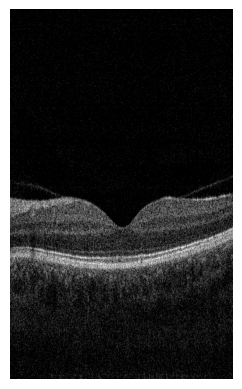

In [5]:
true_labels_all = []
pred_labels_all = []

save_output = True

for f in get_filenames(path, "tif"):
    print(f)
    pred_f = os.path.join(pred_path, "_".join(os.path.basename(f).split("_")[:-1])+".tif")
    label_f = os.path.join(label_path, "_".join(os.path.basename(f).split("_")[:-1])+".tif")

    pred = tiff.imread(pred_f)
    orig = tiff.imread(f)
    label = tiff.imread(label_f)
    print(label.shape)

    unique_values, counts = np.unique(label, return_counts=True)
    unique_values, counts = np.unique(label, return_counts=True)
    print(unique_values, counts)

    # Flatten the 3D arrays to 1D
    true_labels_flat = label.flatten()
    pred_labels_flat = pred.flatten()
    true_labels_all.append(true_labels_flat)
    pred_labels_all.append(pred_labels_flat)

    print(label.shape)
    print(pred.shape)
    plot_confusion_matrix(
        true_labels_flat,
        pred_labels_flat,
        label_map,
        save=save_output,
        suffix=f"{os.path.splitext(os.path.basename(f))[0]}"
    )
    
    # Create an empty color image with shape (z, y, x, 3) for RGB channels
    z, y, x = orig.shape
    color_pred = np.zeros((z, y, x, 3), dtype=np.uint8)
    color_label = np.zeros((z, y, x, 3), dtype=np.uint8)

    # Map the grayscale image to the color image
    for grayscale_value, hex_color in color_map.items():
        rgb_color = hex_to_rgb(hex_color)
        color_pred[pred == grayscale_value] = rgb_color
        color_label[label == grayscale_value] = rgb_color
    
    print("Prediction")
    plt.axis("off")
    plt.imshow(color_pred[9])
    plt.show()
    print("Label")
    plt.axis("off")
    plt.imshow(color_label[9])
    plt.show()
    print("Original")
    plt.axis("off")
    plt.imshow(orig[9], cmap="gray")
    plt.show()

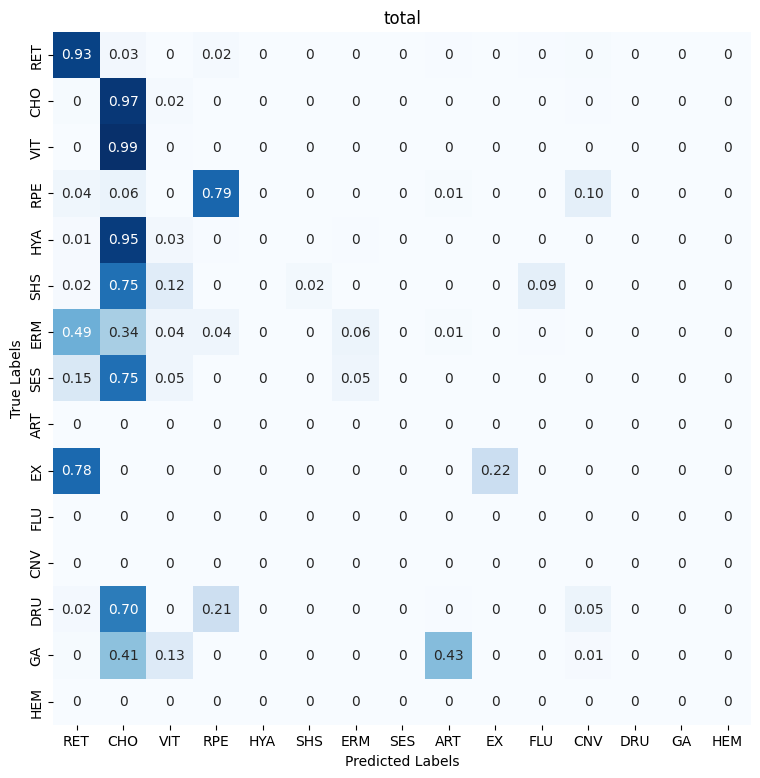

In [6]:
# Concatenate all flattened labels and predictions into 1D arrays
true_labels_all = np.concatenate(true_labels_all)
pred_labels_all = np.concatenate(pred_labels_all)

plot_confusion_matrix(true_labels_all, pred_labels_all, label_map, save=save_output, suffix="total")